Jupyter Widgets (with pywidgets)
============================

Today we are going to discuss creating interactive widgets in a jupyter notebook using python and the pip
package of `pywidgets`.  

## Installation

The installation requires that either `jupyter notebook` or `jupyter lab` is installed.  The process is mostly
the same between the two, only altering around the time the extension activates.  

#### Step 1 - Install jupyter

We start by installing jupyter (lab or notebook)

    pip install jupyter
    pip install jupyterlab
    
#### Step 2 - Install pywidgets

This package contains the core of python widgets

    pip install pywidgets
    
Installing this package gives us python access to the objects, but will not setup jupyter to render them correctly,
for this to occur you must enable the extensions. 

    # Jupyter Notebook
    jupyter nbextension enable --py widgetsnbextension

    # Jupyter Lab
    jupyter labextension install @jupyter-widgets/jupyterlab-manager

**NOTE:** If you are installing for jupyter lab you will also need to also have nodejs v0.5+ installed.  

#### Step 3 - Load Package

Finally, once you have jupyter running and a notebook open you will need to just import the widgets package.  

    import ipywidgets as widgets

In [1]:
import ipywidgets as widgets

## Widgets `Hello World`

There are a number of widgets that have been built and you have access to these widgets through the imported `widgets`
object.  

For this example below we are going to just create a text box that has the value `Hello World`.  

In [2]:
widgets.Text('Hello World')

Text(value='Hello World')

Much like other elements in a jupyter notebook, if the result of the last statement can be rendered, jupyter will
render the object.  However if it is not the result of the last statement you must explicitly render is using the
jupyter built-in `display` call.  

In [3]:
display(widgets.Text('Now you see me'))

widgets.Text("Now you don't")

# The below expression is added so that the above widgets.Text is not the last expression. 
None

Text(value='Now you see me')

## Common widgets

There are a number of common widgets that you can work with.  

- TextBox
- TextArea
- Button
- Checkbox
- DropDown


In [4]:
display(widgets.Text('This is a textbox'))
display(widgets.Textarea('This is a textarea'))
display(widgets.Button(description='This is a button'))
display(widgets.Checkbox(description='This is my box'))
display(widgets.Dropdown(description='This is the dropdown', options=['Me', 'Myself', 'I']))

Text(value='This is a textbox')

Textarea(value='This is a textarea')

Button(description='This is a button', style=ButtonStyle())

Checkbox(value=False, description='This is my box')

Dropdown(description='This is the dropdown', options=('Me', 'Myself', 'I'), value='Me')

## Interact with widgets

Once you have a widget on display, you can interact with that widget, setting or reading its value through code.

For this next section we are going to create textbox in one cell and update its text value in a different cell.  

In [5]:
demo_box = widgets.Text('This is the demo')
display(demo_box)

Text(value='This is the demo')

In [6]:
demo_box.value = 'New description'

Lets try another example, in this case we are going to have a couple of checkboxes that are used
to determine which items should be printed to the screen.  

In [7]:
name_box = widgets.Checkbox(description='Name')
email_box = widgets.Checkbox(description='Email')
score_box = widgets.Checkbox(description='Score')

display(name_box)
display(email_box)
display(score_box)

Checkbox(value=False, description='Name')

Checkbox(value=False, description='Email')

Checkbox(value=False, description='Score')

In [10]:
if name_box.value:
    print('Mike', end=' ')

if email_box.value:
    print('exmaple@test.com', end=' ')

if score_box.value:
    print(f'Score {10}')

Mike exmaple@test.com Score 10


## Jupyter widgets events

While we can interact by having different cells adjust or read previous values using a polling system, it would
be far more useful to have an event driven system that we can use to update on the fly.

For this next example we are going to take a list of names and put a new name in a text box after each click
of a button.  

In [12]:
from time import sleep
from itertools import cycle

names = cycle(['Mike', 'Frank', 'George', 'Blair', 'Steven'])

name_box = widgets.Text(value='No one yet')

name_button = widgets.Button(description='Next Name')

def name_button_event(button):
    name_button.disabled = True
    
    print('Start')
    for i, n in zip(range(10), names):
        name_box.value = n
        sleep(1)
    print('finish')
        
    name_button.disabled = False

name_button.on_click(name_button_event)

display(name_box)
display(name_button)

Text(value='No one yet')

Button(description='Next Name', style=ButtonStyle())

Start
finish
Start
finish
Start
finish


## Widget format/layouts

So far we have just displayed the widgets in order for the display call and without any sort of formatting. For this
next section lets cover the basics and demonstrate how you can `style` a widget (**NOTE:** This is limited in functionality)
as well as place images in relation to each other.  

The first thing we are going to want to do is to display a `label` that has a border.  

In [26]:
widgets.Label('This is one', layout=widgets.Layout(border='dashed 4px lightblue', padding="5px"))

Label(value='This is one', layout=Layout(border='dashed 4px lightblue', padding='5px'))

**NOTE:** It is important to call out that not all css attributes are accessible using a widgets `layout`, 
and that even some attributes are only accessible from certain widgets.  

Now if you have a group of elements you want placed in relationship to each other, you can group widgets into a
container widgets that can then be displayed.  The two container widgets we are going to discuss are:

- HBox
- VBox

For this next section we are going to display 4 buttons in 2 columns and 2 rows.   

In [30]:
column_1 = widgets.VBox([widgets.Button(description='1'), widgets.Button(description='2')])
column_2 = widgets.VBox([widgets.Button(description='3'), widgets.Button(description='4')])
display(widgets.HBox([column_1, column_2]))

If you need or want even more control in the rendering you can use the `Box` widgets which enables you to
use basically all features available to the `flexbox` display type. 

## Put it together (Tic-Tac-Toe)

For this last part we are going to put everything together to quickly create a tic-tac-toe game interface.  The game
itself is found in the `widgets_demo.tictactoe` module.

For this next section we are going to create a tic-tac-toe board and a couple of widgets that will render an interactive
game for us, as well as trigger events. 

In [31]:
from widgets_demo.tictactoe import TicTacToe

#
# Creating the widgets and rendering to the screen
#
status_label = widgets.Label(layout=widgets.Layout(flex='1 1 auto', justify_content='center'))
game_buttons = [widgets.Button(layout=widgets.Layout(flex='1 1 auto', width='auto')) for _ in range(9)]
clear_button = widgets.Button(description='Clear', layout=widgets.Layout(flex='1 1 auto', width='auto', margin='20px'))

button_vboxes = [
    widgets.HBox([game_buttons[(s*3) + i] for i in range(0, 3)], layout=widgets.Layout(width='100%'))
    for s in range(3)
]

display(widgets.VBox([
    status_label,
    *button_vboxes,
    clear_button
]))


#
# Creating the game
#
game = TicTacToe()

def update_board_output():
    board = game.board
    for piece, button in zip(board, game_buttons):
        if piece is None:
            button.disabled = False
            button.description = ' '
        else:
            button.disabled = True
            button.description = piece
    
    winner = game.winner
    if winner is not None:
        status_label.value = f'We have a winner: {winner}'
        for button in game_buttons:
            button.disabled = True
        return
    
    player = game.turn
    status_label.value = f"player {player}'s turn"
    
            
update_board_output()
    
#
# Adding the events
#
def clear_click_event(button):
    game.clear()
    update_board_output()


def game_piece_click_event(button):
    button_index = game_buttons.index(button)
    game.play_point(button_index)
    update_board_output()
    

for button in game_buttons:
    button.on_click(game_piece_click_event)
    
clear_button.on_click(clear_click_event)

## Extra stuff

There is one final item that I think would be useful, especially when trying to better understand how algorithms
and operations interact.  In the below cell we are going to define the gaussian function and plot it, in such a way
that $\sigma$ can be adjusted to see different outputs. 

$$g(x) = \frac{1}{\sigma{\sqrt{2\pi}}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

<IPython.core.display.Javascript object>


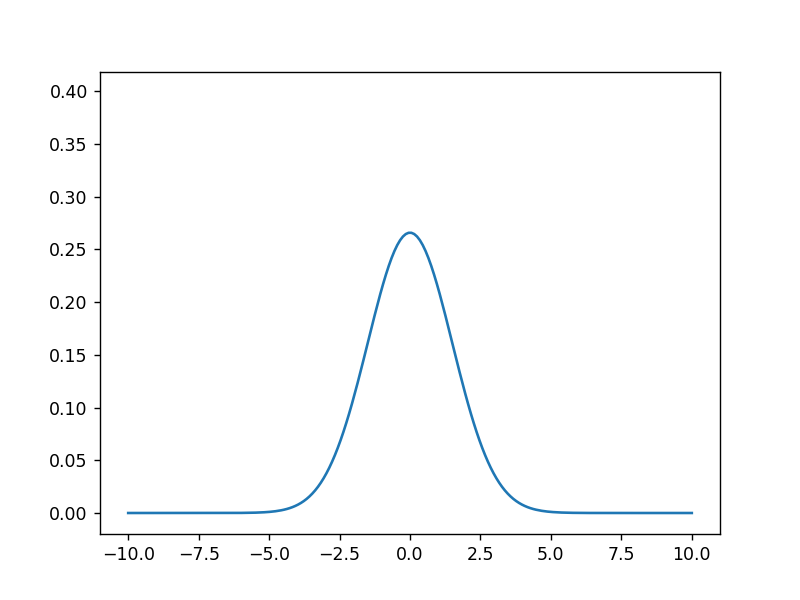

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.update(w=1.0)>

In [32]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


def gaussian(X, sigma=1, mu=0):
    Y = []
    if sigma == 0:
        return [0 for _ in X]
    
    left = 1 / (sigma * np.sqrt(2 * np.pi))
    for x in X:
        right = np.exp(-0.5 * np.power((x - mu) / sigma, 2))
        Y.append(left * right)
    return Y

x = np.linspace(-10, 10, num=200)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, gaussian(x)) # np.sin(x))

def update(w = 1.0):
    line.set_ydata(gaussian(x, sigma=w))
    fig.canvas.draw()

widgets.interact(update)